<a href="https://colab.research.google.com/github/abidshafee/google.colaboratory_project/blob/master/EurUsd_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Description: This is a program that predict future currency price using artificial recurrent nural network - 
# The artificial recurrent nural network architecture also called 'Long Short Term Memory' or LSTM
# Predicting the closing price of EURUSD currency pair using the past 60 days price.

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [7]:
# geting the eurousd quotes
df = web.DataReader('EURUSD=X', data_source='yahoo', start='2019-07-13', end='2020-7-13')
# view data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-14,1.128599,1.125568,1.127180,1.127205,0,1.127205
2019-07-15,1.126634,1.120900,1.126088,1.126177,0,1.126177
2019-07-16,1.123343,1.120109,1.121328,1.121227,0,1.121227
2019-07-17,1.124733,1.120624,1.122776,1.122965,0,1.122965
2019-07-18,1.127142,1.121504,1.126152,1.126152,0,1.126152
...,...,...,...,...,...,...
2020-07-05,1.134687,1.124885,1.124885,1.124720,0,1.124720
2020-07-06,1.133658,1.126037,1.131030,1.131286,0,1.131286
2020-07-07,1.134559,1.126519,1.127281,1.127523,0,1.127523


In [8]:
# number of rows and column in the dataset
df.shape

(260, 6)

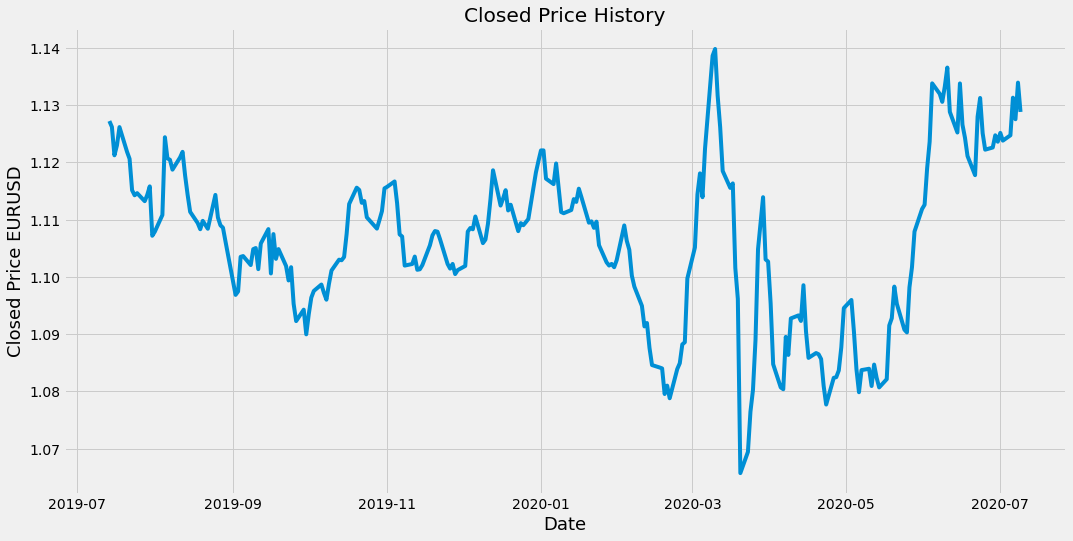

In [10]:
# our dataframe has 260 rows and 6 column except index column
# Visualizing data specially the closing price, because we are gonna built iur model on closed price
plt.figure(figsize = (16,8))
plt.title('Closed Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closed Price EURUSD', fontsize=18)
plt.show()

In [16]:
# creating a new dataframe only with close price column
newdf = df.filter(['Close'])
# now, converting the new dataframe to numpy array
dataset = newdf.values
# dataset.shape
# taking the number of rows to train the model
training_data_len = math.ceil(len(dataset)*0.8)
# using math.ceil to roundup number
training_data_len

208